## <center>Підготовка та аналіз даних</center>
## <center>Лабораторна робота №4 (2 частина)</center>
#### <center>ФБ-25 Кравченко Максим</center>

In [1]:
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import seaborn as sns

## Другий рівень

Завантажую дані, щоб переглянути, з чим я буду працювати, друкую перші 5 стрічок

In [2]:
file_name = r'Datasets\adult.data'
with open(file_name, 'r') as file:
    first_line = file.readline()
    print(first_line)
    for i in range(5):
        line = file.readline()
        if line:
            print(line)
        else:
            break

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K

50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K

38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K

53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K

28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K

37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K



Читаю дані з файлу та формую масив

In [3]:
def read_file(file_name):
    data_array = np.genfromtxt(file_name, delimiter=', ', skip_header=1, dtype=None, encoding=None)
    return data_array

data_array = read_file(file_name)

time_taken = timeit.timeit(stmt='read_file(file_name)', globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

print(data_array)

Execution time: 52.67279240000062 seconds
[(50, 'Self-emp-not-inc',  83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male',     0, 0, 13, 'United-States', '<=50K')
 (38, 'Private', 215646, 'HS-grad',  9, 'Divorced', 'Handlers-cleaners', 'Not-in-family', 'White', 'Male',     0, 0, 40, 'United-States', '<=50K')
 (53, 'Private', 234721, '11th',  7, 'Married-civ-spouse', 'Handlers-cleaners', 'Husband', 'Black', 'Male',     0, 0, 40, 'United-States', '<=50K')
 ...
 (58, 'Private', 151910, 'HS-grad',  9, 'Widowed', 'Adm-clerical', 'Unmarried', 'White', 'Female',     0, 0, 40, 'United-States', '<=50K')
 (22, 'Private', 201490, 'HS-grad',  9, 'Never-married', 'Adm-clerical', 'Own-child', 'White', 'Male',     0, 0, 20, 'United-States', '<=50K')
 (52, 'Self-emp-inc', 287927, 'HS-grad',  9, 'Married-civ-spouse', 'Exec-managerial', 'Wife', 'White', 'Female', 15024, 0, 40, 'United-States', '>50K')]


## Завдання 2

1. Поборотися із зниклими даними

In [4]:
def check_missing_values(data_array):
    string_data_array = np.array([tuple(str(item) for item in row) for row in data_array])
    has_question_mark = np.any(string_data_array == '?')

    if has_question_mark:
        print("There are '?' values in the array")
    else:
        print("There are no '?' values in the array")

In [5]:
string_data_array = np.array([tuple(str(item) for item in row) for row in data_array])

check_missing_values(string_data_array)

There are '?' values in the array


In [6]:
def data_cleaning():
    mask = np.all((string_data_array != '?') & (string_data_array != 'nan'), axis=1)
    cleaned_data_array = string_data_array[mask]
    return cleaned_data_array

time_taken = timeit.timeit(stmt='data_cleaning()', globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

cleaned_data_array = data_cleaning()
print(cleaned_data_array)

Execution time: 2.8538391000474803 seconds
[['50' 'Self-emp-not-inc' '83311' ... '13' 'United-States' '<=50K']
 ['38' 'Private' '215646' ... '40' 'United-States' '<=50K']
 ['53' 'Private' '234721' ... '40' 'United-States' '<=50K']
 ...
 ['58' 'Private' '151910' ... '40' 'United-States' '<=50K']
 ['22' 'Private' '201490' ... '20' 'United-States' '<=50K']
 ['52' 'Self-emp-inc' '287927' ... '40' 'United-States' '>50K']]


In [7]:
check_missing_values(cleaned_data_array)

There are no '?' values in the array


## Завдання 2
Пронормувати вибраний датасет (нормалізація має бути реалізована як окрема функція без застосування додаткових бібліотек, як наприклад 
sklearn.preprocessing).


In [8]:
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

Нормалізую дані в копії датафрейму

In [9]:
copy_data_array = cleaned_data_array.copy()

columns_to_normalize = [0, 2, 4, 10, 11, 12]

for col_index in columns_to_normalize:
    copy_data_array[:, col_index] = normalize(copy_data_array[:, col_index].astype(float))

time_taken = timeit.timeit(stmt="normalize(copy_data_array[:, 0].astype(float))", globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

print(copy_data_array)

Execution time: 1.743767099978868 seconds
[['0.4520547945205479' 'Self-emp-not-inc' '0.047277379845214206' ...
  '0.12244897959183673' 'United-States' '<=50K']
 ['0.2876712328767123' 'Private' '0.1372439045614493' ...
  '0.3979591836734694' 'United-States' '<=50K']
 ['0.4931506849315068' 'Private' '0.15021183790457232' ...
  '0.3979591836734694' 'United-States' '<=50K']
 ...
 ['0.5616438356164384' 'Private' '0.09391367129501216' ...
  '0.3979591836734694' 'United-States' '<=50K']
 ['0.0684931506849315' 'Private' '0.12762010039865773' ...
  '0.19387755102040816' 'United-States' '<=50K']
 ['0.4794520547945205' 'Self-emp-inc' '0.1863833640620666' ...
  '0.3979591836734694' 'United-States' '>50K']]


## Завдання 3

3. Збудувати гістограму по одному із атрибутів, що буде показувати на 
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте

In [10]:
min_value_hours = copy_data_array[:, 12].astype(float).min()
max_value_hours = copy_data_array[:, 12].astype(float).max()
# min_value_hours = cleaned_data_array[:, 12].astype(float).min()
# max_value_hours = cleaned_data_array[:, 12].astype(float).max()
print(f'Min value: {min_value_hours}'
      f'\nMax value: {max_value_hours}')

Min value: 0.0
Max value: 1.0


Діапазони значень визначаються окремою функцією

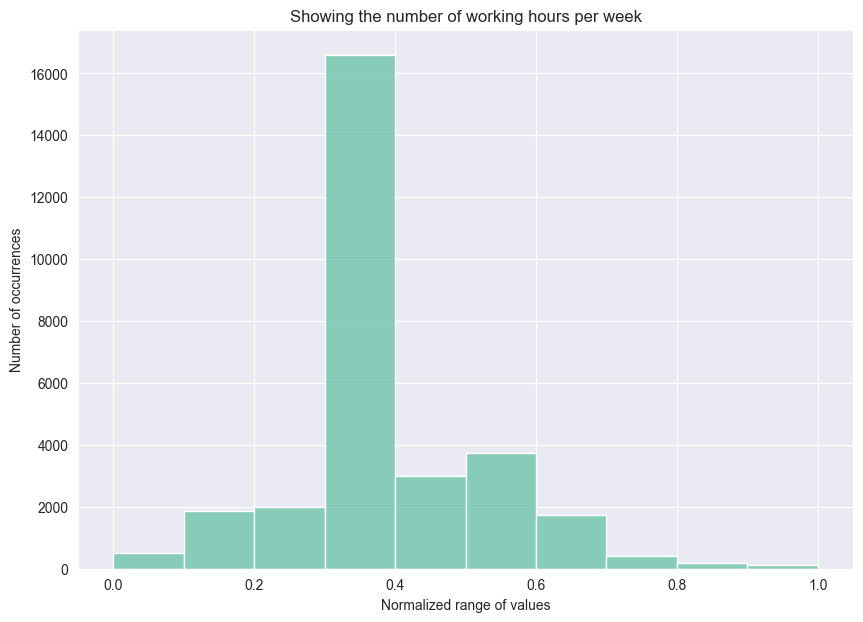

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 7))
with sns.color_palette("Set2"):
    sns.histplot(copy_data_array[:, 12].astype(float), bins=10, binrange=(min_value_hours, max_value_hours))
    # sns.histplot(cleaned_data_array[:, 12].astype(float), bins=10, binrange=(min_value_hours, max_value_hours))

plt.xlabel('Normalized range of values')
plt.ylabel('Number of occurrences')
plt.title('Showing the number of working hours per week')
plt.show()

## Завдання 4

4. Збудувати графік залежності одного integer/real атрибута від іншого.

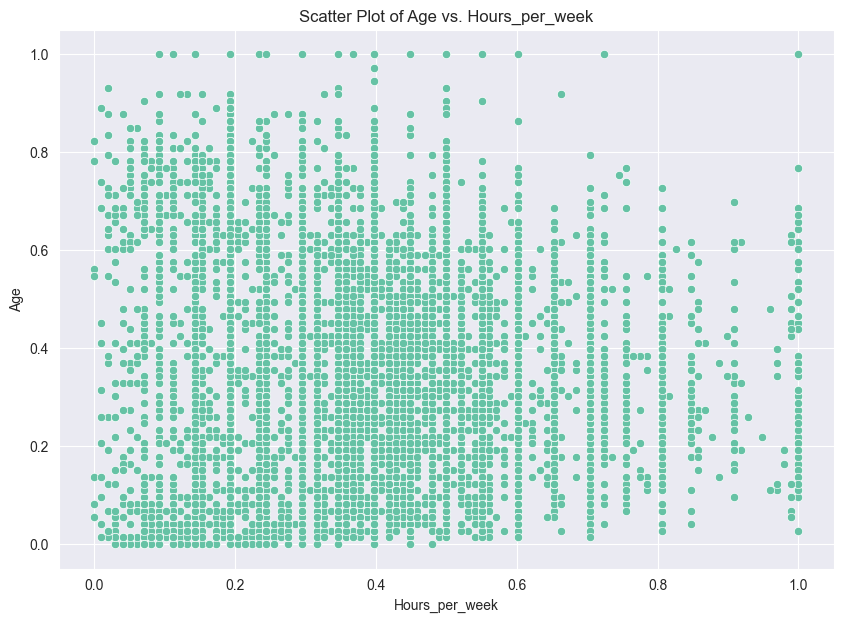

In [12]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 7))

with sns.color_palette("Set2"):
    sns.scatterplot(x=copy_data_array[:, 12].astype(float), y=copy_data_array[:, 0].astype(float))
#   sns.lineplot(x=copy_data_array[:, 12].astype(float), y=copy_data_array[:, 0].astype(float))

plt.xlabel('Hours_per_week')
plt.ylabel('Age')
plt.title('Scatter Plot of Age vs. Hours_per_week')
plt.show()

## Завдання 5

5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів

Коефіцієнт кореляції Пірсона вимірює ступінь лінійної залежності між двома змінними. Він приймає значення від -1 до 1.
<br>1 - позитивна залежність
<br>-1 - негативна залежність

Коефіцієнт кореляції Спірсона вимірює ступінь монотонної залежності між двома змінними. Він приймає значення від -1 до 1.
<br>1 - позитивна залежність
<br>-1 - негативна залежність

In [13]:
def pearson_corr():
    pearson_corr = np.corrcoef(copy_data_array[:, 0].astype(float), copy_data_array[:, 12].astype(float))
    # print(pearson_corr)
    pearson_corr = pearson_corr[0, 1]

    return pearson_corr

time_taken = timeit.timeit(stmt="pearson_corr()", globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

print(f'Pearson\'s correlation coefficient: {round(pearson_corr(), 3)}')

Execution time: 3.51936370000476 seconds
Pearson's correlation coefficient: 0.102


In [14]:
def spearman_corr():
    data1_rank = np.argsort(np.argsort(copy_data_array[:, 0].astype(float)))
    data2_rank = np.argsort(np.argsort(copy_data_array[:, 12].astype(float)))
    
    d = data1_rank - data2_rank
    d_squared = d**2
    
    sum_d_squared = np.sum(d_squared)
    
    n = len(copy_data_array[:, 0].astype(float))
    spearman_corr = 1 - (6 * sum_d_squared) / (n * (n**2 - 1))
    return spearman_corr

time_taken = timeit.timeit(stmt="spearman_corr()", globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

print(f'Spearman\'s correlation coefficient: {round(spearman_corr(), 3)}')

Execution time: 5.769847899966408 seconds
Spearman's correlation coefficient: 0.144


## Завдання 6

6. Провести One Hot Encoding категоріального string атрибуту

Спочатку дивимось на унікальні значення в стовпці 'Relationship'

In [15]:
unique_value = np.unique(copy_data_array[:, 7])
num_unique_value = len(unique_value)
print(f'Unique values: {unique_value}')
print(f'Number of unique values: {num_unique_value}')

Unique values: ['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
Number of unique values: 6


Додаємо нові стовпці, які будуть відповідати кожному унікальному значенню в стовпці 'Relationship'

In [16]:
def one_hot_encoding():
    column = copy_data_array[:, 7]
    value_to_index = {value: index for index, value in enumerate(unique_value)}
    indexed_column = np.vectorize(value_to_index.get)(column)
    one_hot_encoded_column = np.eye(len(unique_value))[indexed_column]
    # print(one_hot_encoded_column)
    one_hot_encoded_data = cleaned_data_array.copy()
    one_hot_encoded_data = np.hstack((one_hot_encoded_data, one_hot_encoded_column))
    return one_hot_encoded_data

time_taken = timeit.timeit(stmt="one_hot_encoding()", globals=globals(), number=100)
print(f"Execution time: {time_taken} seconds")

print(one_hot_encoding())

Execution time: 7.761648099985905 seconds
[['50' 'Self-emp-not-inc' '83311' ... '0.0' '0.0' '0.0']
 ['38' 'Private' '215646' ... '0.0' '0.0' '0.0']
 ['53' 'Private' '234721' ... '0.0' '0.0' '0.0']
 ...
 ['58' 'Private' '151910' ... '0.0' '1.0' '0.0']
 ['22' 'Private' '201490' ... '1.0' '0.0' '0.0']
 ['52' 'Self-emp-inc' '287927' ... '0.0' '0.0' '1.0']]


## Завдання 7

7. Провести візуалізацію багатовимірних даних

In [17]:
pairplot_data = cleaned_data_array[:, [0, 2, 4, 10, 11, 12]].astype(float)



pp = sns.pairplot(pairplot_data, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Adult Attributes Pairwise Plots', fontsize=14)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

Так як наша функція, приймає лише pandas DataFrame, то перетворюємо нашу матрицю в DataFrame

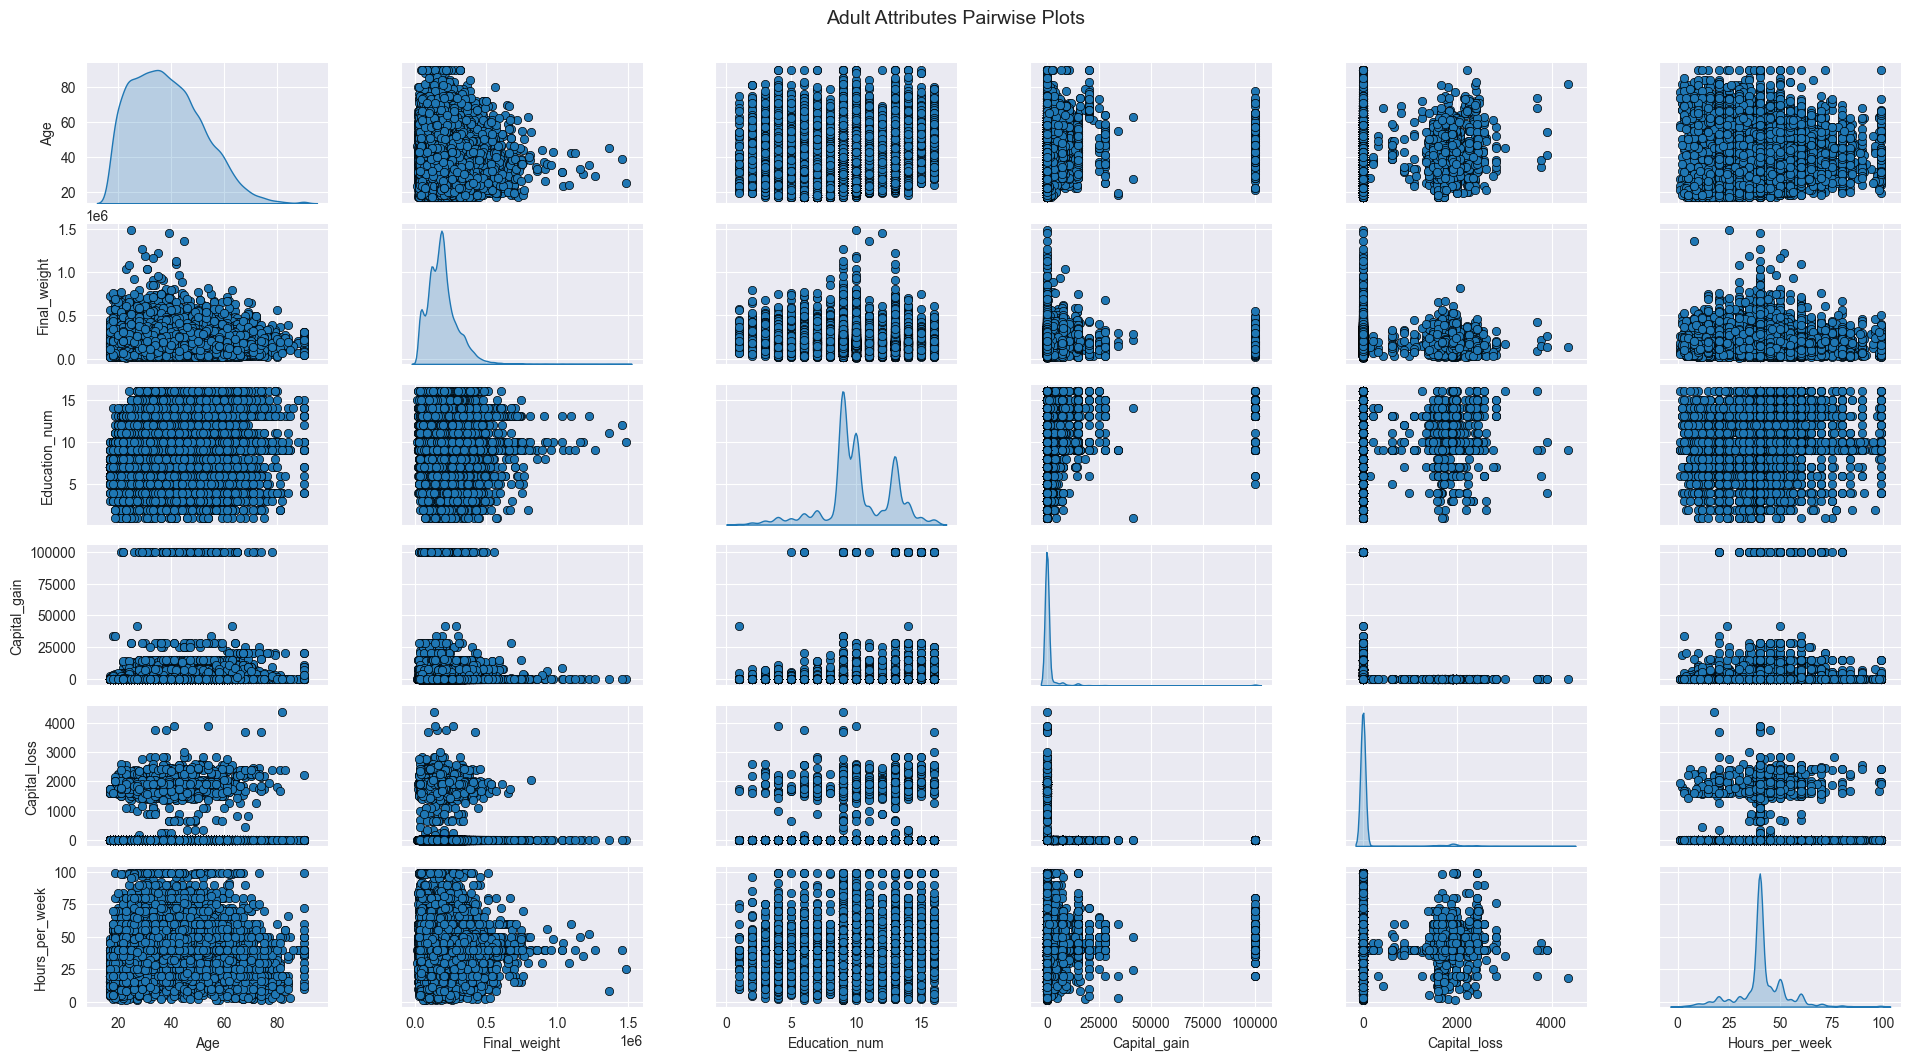

In [18]:
cols = ['Age', 'Final_weight', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
df = pd.DataFrame(pairplot_data, columns=cols)
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(fill=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Adult Attributes Pairwise Plots', fontsize=14)